# Nama : Ribowo Agusti Sunoki
# NIM : 09011281722047
# Kelas : SK5A

<h1 align = "center"> <font color='darkblue'>PENDETEKSIAN DETAK JANTUNG</h1> </font>
<h3 align = "center"> <font color='black'>Dengan data PTB ECG</h5> </font>

<h3 align = "left"> <font color='black'>DATASET</h5> </font>

Informasi:
Dataset diambil dari sumber PTB Diagnostic Ecg Database bisa di download di kaggle.
Link: https://www.kaggle.com/shayanfazeli/heartbeat

Data yang didapat sudah di scaling menjadi 0 dan 1, data sinyal dipotong sebanyak 187node per beat.
Memiliki data jantung yang diantaranya 'Normal' dan 'MI(Myocardial Infarction)'

<h3 align = "left"> <font color='black'>IMPORT LIBRARY</h5> </font>

MODUL yang diperlukan:

1. numpy = Digunakan Untuk Menginput Array
2. pandas = Fungsinya Seperti Numpy, Namun Lebih Kearah Matriks Dengan Baris Dan Kolom Yang Telah Dimuat Dalam Bentuk Tabel
3. matplotlib.pyplot = Digunakan Untuk Membuat Grafik Dataset Yang Telah Valid
4. sklearn: 
           a. train_test_split  
           b. confusion_matrix 
           c. classification_report 
           d. PCA(Principal Component Analysis) 
5. keras:
        a. Optimizers Adam
        b. Model Sequential
        c. Layers Dense
        d. Aktivasi Relu
        e. utils to_categorical
        

<h3 align = "left"> <font color='black'>MEMANGGIL DATASET</h5> </font>

Memanggil dataset ptbdb yang telah digabung secara manual dengan menggunakan fitur pandas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, coverage_error
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from keras.utils import to_categorical
from mlxtend.plotting import plot_confusion_matrix

Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:
df = np.loadtxt('data/ptbdb.csv', delimiter=',')

<h3 align = "left"> <font color='black'>Features dan Labels</h5> </font>

Pada Dataset, Features dan Label dipisahkan supaya bisa dipelajari oleh mesin

leat= Features dengan 187node

label= Labels yang mewakili 2 kelas

In [3]:
feat = df[:,0:187]
label = df[:,187]

<h3 align = "left"> <font color='black'>Mereduksi Fitur</h5> </font>

Menggunakan PCA ( Principal Component Analysis ) untuk mereduksi fitur yang banyak menjadi lebih sedikit namun bisa merepresentasikan semua fitur tanpa mengurangi informasi yang banyak.

In [4]:
pca = PCA(n_components=36)
all_feat_pca = pca.fit_transform(feat)

<h3 align = "left"> <font color='black'>Splitting</h5> </font>

Data fitur dan label dibagi menjadi data train dan test dengan ratio 9 : 1

In [5]:
feat_train, feat_test, label_train, label_test = train_test_split(all_feat_pca, label, test_size=0.1, random_state=2)

(array([ 413.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1043.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

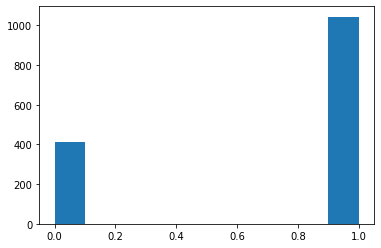

In [6]:
plt.hist(label_test)

<h3 align = "left"> <font color='black'>ANN(Artificial Neural Network)</h5> </font>

Menggunakan model `Sequential()`. Pada Model ini terdapat `Input layer` , `Hidden layer` dan `Output layer`. 
- Input layer          -> Layer pertama terbentuk dari layer Neural sesuai fitur dengan menggunakan activation relu.   
- Hidden Layer pertama -> 100 units Neural Network dengan menggunakan activation relu.
- Hidden Layer Kedua   -> 100 units Neural Network dengan menggunakan activation relu.
- Output layer         -> 1 unit Neural Network dengan menggunakan activation sigmoid.

In [7]:
model = Sequential()
model.add(Dense(units= 100, input_dim =36 , activation=relu))
model.add(Dense(units= 100, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))

<h3 align = "left"> <font color='black'>Compile Model</h5> </font>

In [8]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Setalah itu fit model. Pada tahap ini dilakukan proses untuk mendapatkan akurasi dan loss dari dataset.

In [9]:
acc_training = model.fit(feat_train, label_train, validation_data=(feat_test, label_test), batch_size=40, epochs=200)


Train on 13096 samples, validate on 1456 samples
Epoch 1/200
13096/13096 [==============================] - 1s 71us/step - loss: 0.6244 - accuracy: 0.7129 - val_loss: 0.6079 - val_accuracy: 0.7157
Epoch 2/200
13096/13096 [==============================] - 1s 50us/step - loss: 0.5902 - accuracy: 0.7226 - val_loss: 0.5795 - val_accuracy: 0.7163
Epoch 3/200
13096/13096 [==============================] - 1s 49us/step - loss: 0.5653 - accuracy: 0.7226 - val_loss: 0.5584 - val_accuracy: 0.7163
Epoch 4/200
13096/13096 [==============================] - 1s 50us/step - loss: 0.5465 - accuracy: 0.7226 - val_loss: 0.5423 - val_accuracy: 0.7163
Epoch 5/200
13096/13096 [==============================] - 1s 50us/step - loss: 0.5319 - accuracy: 0.7226 - val_loss: 0.5294 - val_accuracy: 0.7163
Epoch 6/200
13096/13096 [==============================] - 1s 49us/step - loss: 0.5198 - accuracy: 0.7226 - val_loss: 0.5184 - val_accuracy: 0.7163
Epoch 7/200
13096/13096 [==============================] - 1s 

Epoch 109/200
13096/13096 [==============================] - 1s 48us/step - loss: 0.2796 - accuracy: 0.8888 - val_loss: 0.2739 - val_accuracy: 0.8826
Epoch 110/200
13096/13096 [==============================] - 1s 48us/step - loss: 0.2788 - accuracy: 0.8897 - val_loss: 0.2729 - val_accuracy: 0.8832
Epoch 111/200
13096/13096 [==============================] - 1s 49us/step - loss: 0.2779 - accuracy: 0.8899 - val_loss: 0.2721 - val_accuracy: 0.8846
Epoch 112/200
13096/13096 [==============================] - 1s 50us/step - loss: 0.2771 - accuracy: 0.8907 - val_loss: 0.2712 - val_accuracy: 0.8846
Epoch 113/200
13096/13096 [==============================] - 1s 50us/step - loss: 0.2762 - accuracy: 0.8912 - val_loss: 0.2702 - val_accuracy: 0.8860
Epoch 114/200
13096/13096 [==============================] - 1s 50us/step - loss: 0.2754 - accuracy: 0.8921 - val_loss: 0.2693 - val_accuracy: 0.8853
Epoch 115/200
13096/13096 [==============================] - 1s 48us/step - loss: 0.2746 - accuracy:

<h3 align = "left"> <font color='black'>Menghitung Akurasi</h5> </font>

In [10]:
acc_testing = model.evaluate(feat_test, label_test) 
acc_testing

1456/1456 [==============================] - 0s 29us/step


[0.2098444272856136, 0.9258241653442383]

<h3 align = "left"> <font color='black'>Plotting MODEL AKURASI DAN MODEL LOSS</h5> </font>

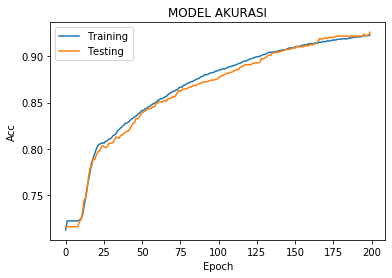

In [11]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('MODEL AKURASI')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

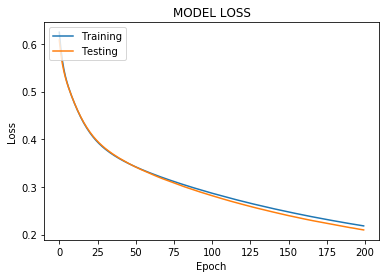

In [12]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

<h3 align = "left"> <font color='black'>CONFUSION MATRIKS</h5> </font>


Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

Confusion Matriks terdiri dari
- True Positif
- False Positif
- False Negative
- True Negativ

True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah).

Berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score. Untuk memperoleh nilai akurasi, presisi dan recall kita dapat menggunakan rumus:

<font size = 3>
$$
F1 Score = \frac {2 x Sensitivity x Precision}{Sensitivity + Precision}
$$
</font>

Confussion matriks:
 [[360  53]
 [ 55 988]]


<Figure size 432x288 with 0 Axes>

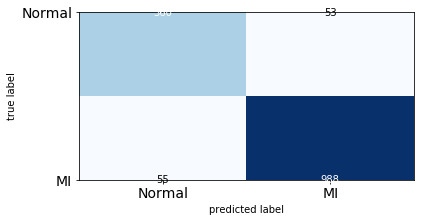

In [13]:
prediction = model.predict_classes(feat_test)
cm = confusion_matrix(label_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)

plt.figure()
plot_confusion_matrix(cm,figsize=(6,4), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'MI'], fontsize=14)
plt.yticks(range(2), ['Normal', 'MI'], fontsize=14)
plt.show()

<h3 align = "left"> <font color='black'>EVALUASI MODEL</h5> </font>

In [14]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)


print ("precesion : ",precision*100)
print("recall : ",recall*100)
print ("F1 : ",f1*100)
print("akurasi : ",akurasi*100)

precesion :  87.16707021791767
recall :  86.74698795180723
F1 :  86.95652173913044
akurasi :  92.58241758241759


In [15]:
print(classification_report(label_test,prediction))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       413
         1.0       0.95      0.95      0.95      1043

    accuracy                           0.93      1456
   macro avg       0.91      0.91      0.91      1456
weighted avg       0.93      0.93      0.93      1456



<h3 align = "left"> <font color='black'>KESIMPULAN</h5> </font>

Dari percobaan yang telah dilakukan maka dapat disimpulkan bahwa dataset PTB ECG mendapatkan akurasi sebesar 92% dengan menggunakan metode Artificial Neural Network.